<a href="https://colab.research.google.com/github/Imposon/AI-dataset/blob/main/Crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install numpy

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import plotly.express as px


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df=pd.read_csv('/content/CRUDE_OIL_DATASET.csv')


In [8]:
df.shape

(532, 8)

In [9]:
df.head(50)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34
5,April,2024,HSD,Import,1.75,11.46,1.37,2025-04-26 04:00:34
6,April,2024,LOBS/ Lube oil,Import,284.54,2191.06,262.64,2025-04-26 04:00:34
7,April,2024,Fuel Oil,Import,791.92,3257.57,390.72,2025-04-26 04:00:34
8,April,2024,Bitumen,Import,274.25,857.49,102.81,2025-04-26 04:00:34
9,April,2024,Petcoke,Import,1026.11,1046.45,125.47,2025-04-26 04:00:34


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Month                                 532 non-null    object 
 1   Year                                  532 non-null    int64  
 2   PRODUCTS                              532 non-null    object 
 3   TRADE                                 532 non-null    object 
 4   Quantity (000 Metric Tonnes)          489 non-null    float64
 5   Value in Rupees (Crore)               489 non-null    float64
 6   Value in Dollars (Million US dollar)  489 non-null    float64
 7   date_updated                          532 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 33.4+ KB


In [11]:
df.describe()

,Year,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar)
count,532.000000,489.000000,489.000000,489.000000
mean,2023.543233,3309.092147,15458.694826,1857.170941
std,0.498596,6701.983616,30716.954459,3688.391630
min,2023.000000,0.000000,0.020000,0.000000
25%,2023.000000,54.480000,308.250000,37.550000
50%,2024.000000,375.250000,1640.080000,196.370000
75%,2024.000000,1908.680000,9523.920000,1143.730000
max,2024.000000,26407.210000,129174.880000,15477.590000


In [12]:
pd.isnull(df).sum()

,0
Month,0
Year,0
PRODUCTS,0
TRADE,0
Quantity (000 Metric Tonnes),43
Value in Rupees (Crore),43
Value in Dollars (Million US dollar),43
date_updated,0


In [13]:
# Step 1: Define products to exclude (including 'TOTAL PRODUCT EXPORT')
excluded_products = ['NET IMPORT', 'TOTAL IMPORT', 'TOTAL PRODUCT EXPORT']

# Step 2: Ensure the product names are stripped of extra spaces and then filter the DataFrame
df_filtered = df[~df['PRODUCTS'].str.strip().isin(excluded_products)]
df_filtered = df[~df['PRODUCTS'].str.upper().str.contains('TOTAL','NET')]

In [14]:
# For numeric columns
df_filtered['Quantity (000 Metric Tonnes)'].fillna(df['Quantity (000 Metric Tonnes)'].mean(),inplace=True)
df_filtered['Value in Rupees (Crore)'].fillna(df['Value in Rupees (Crore)'].mean(),inplace=True)
df_filtered['Value in Dollars (Million US dollar)'].fillna(df['Value in Dollars (Million US dollar)'].mean(),inplace=True)

In [15]:
pd.isnull(df_filtered).sum()

,0
Month,0
Year,0
PRODUCTS,0
TRADE,0
Quantity (000 Metric Tonnes),0
Value in Rupees (Crore),0
Value in Dollars (Million US dollar),0
date_updated,0


In [16]:

orders_per_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Total Orders')

print(orders_per_month)

    Year      Month  Total Orders
0   2023      April            25
1   2023     August            25
2   2023   December            25
3   2023       July            25
4   2023       June            25
5   2023        May            25
6   2023   November            25
7   2023    October            25
8   2023  September            25
9   2024      April            24
10  2024     August            24
11  2024   February            25
12  2024    January            25
13  2024       July            24
14  2024       June            24
15  2024      March            25
16  2024        May            24
17  2024   November            24
18  2024    October            24
19  2024  September            24


In [18]:
# Step 1: Define products to exclude (including 'TOTAL PRODUCT EXPORT')
df_filtered = df[~df['PRODUCTS'].str.contains('TOTAL|NET', case=False, na=False)]

In [19]:
df_filtered.head(50)

,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34
5,April,2024,HSD,Import,1.75,11.46,1.37,2025-04-26 04:00:34
6,April,2024,LOBS/ Lube oil,Import,284.54,2191.06,262.64,2025-04-26 04:00:34
7,April,2024,Fuel Oil,Import,791.92,3257.57,390.72,2025-04-26 04:00:34
8,April,2024,Bitumen,Import,274.25,857.49,102.81,2025-04-26 04:00:34
9,April,2024,Petcoke,Import,1026.11,1046.45,125.47,2025-04-26 04:00:34


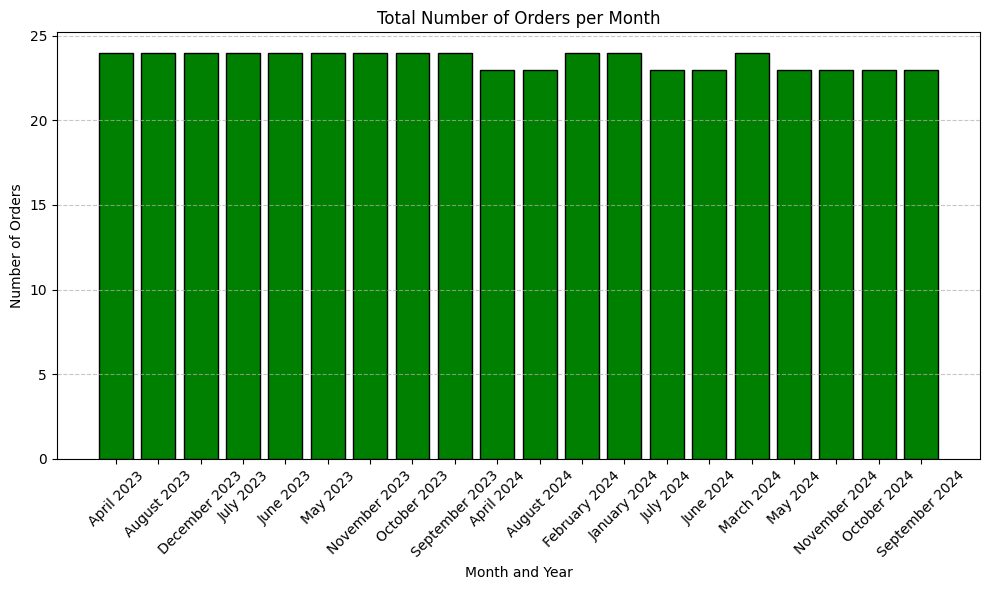

In [20]:


# Group and count total orders per Year-Month
orders_per_month = df_filtered.groupby(['Year', 'Month']).size().reset_index(name='Total Orders')

# Combine Month and Year into a single label column for the x-axis
orders_per_month['Month_Year'] = orders_per_month['Month'] + ' ' + orders_per_month['Year'].astype(str)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(orders_per_month['Month_Year'], orders_per_month['Total Orders'], color='green', edgecolor='black')
plt.title('Total Number of Orders per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


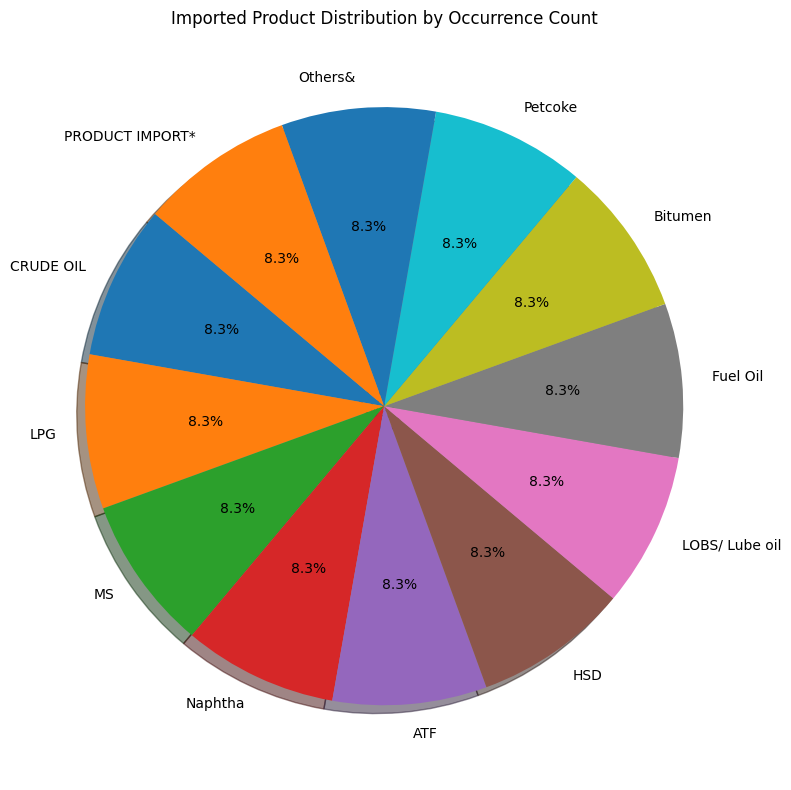

In [21]:
df_import = df_filtered[df_filtered['TRADE'] == 'Import']

# Step 4: Count occurrences of each product
product_counts = df_import['PRODUCTS'].value_counts()

# Step 5: Plot pie chart
plt.figure(figsize=(10, 8))
product_counts.plot.pie(autopct='%1.1f%%', startangle=140, shadow=True)
plt.title('Imported Product Distribution by Occurrence Count')
plt.ylabel('')  # Remove y-axis label
plt.tight_layout()
plt.show()

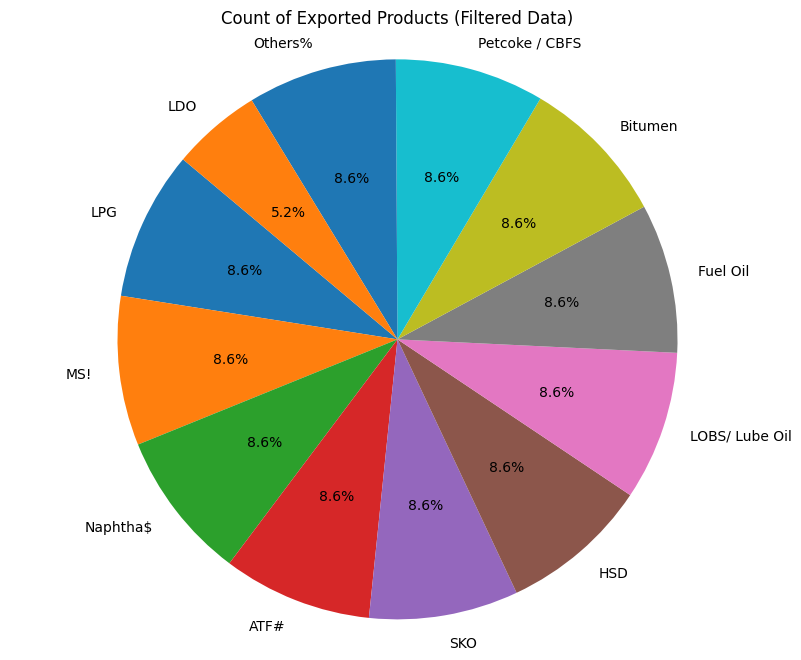

In [22]:
export_df = df_filtered[df_filtered['TRADE'] == 'Export']

# Step 2: Count how many times each product was exported
product_counts = export_df['PRODUCTS'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Count of Exported Products (Filtered Data)')
plt.axis('equal')
plt.show()

In [23]:
# Step 1: Group by Year, Month, and Trade Type
grouped = df_filtered.groupby(['Year', 'Month', 'TRADE'])['Value in Rupees (Crore)'].sum().reset_index()

# Step 2: Pivot to have Import and Export in columns
pivot = grouped.pivot_table(index=['Year', 'Month'],
                            columns='TRADE',
                            values='Value in Rupees (Crore)',
                            fill_value=0).reset_index()

# Step 3: Calculate Net Value = Import - Export
pivot['Net Import (₹ Crore)'] = pivot.get('Import', 0) - pivot.get('Export', 0)

# Step 4: View result
print(pivot)


TRADE  Year      Month    Export     Import  Net Import (₹ Crore)
0      2023      April  27417.97  113384.39              85966.42
1      2023     August  40834.23  124125.21              83290.98
2      2023   December  35299.93  128446.71              93146.78
3      2023       July  33918.95  110796.81              76877.86
4      2023       June  28351.42  110817.28              82465.86
5      2023        May  29392.00  119018.03              89626.03
6      2023   November  35730.56  131110.84              95380.28
7      2023    October  30132.90  138722.25             108589.35
8      2023  September  35325.68  124494.20              89168.52
9      2024      April  30933.23  143486.39             112553.16
10     2024     August  28529.52  130819.71             102290.19
11     2024   February  34032.42  119792.13              85759.71
12     2024    January  28664.06  132526.14             103862.08
13     2024       July  30708.65  131524.71             100816.06
14     202

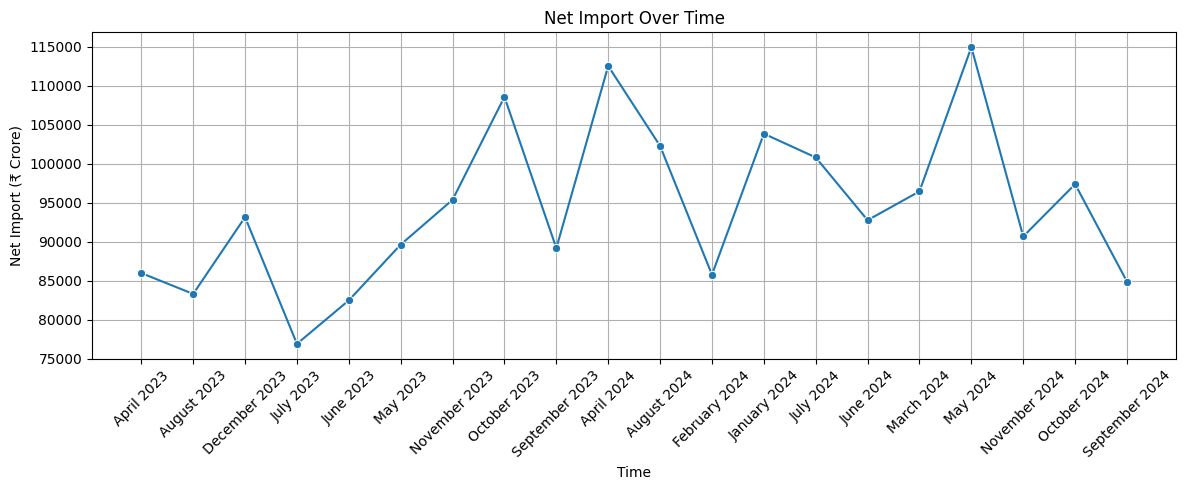

In [24]:
pivot['Time'] = pivot['Month'] + " " + pivot['Year'].astype(str)

plt.figure(figsize=(12, 5))
sns.lineplot(data=pivot, x='Time', y='Net Import (₹ Crore)', marker='o')
plt.title('Net Import Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

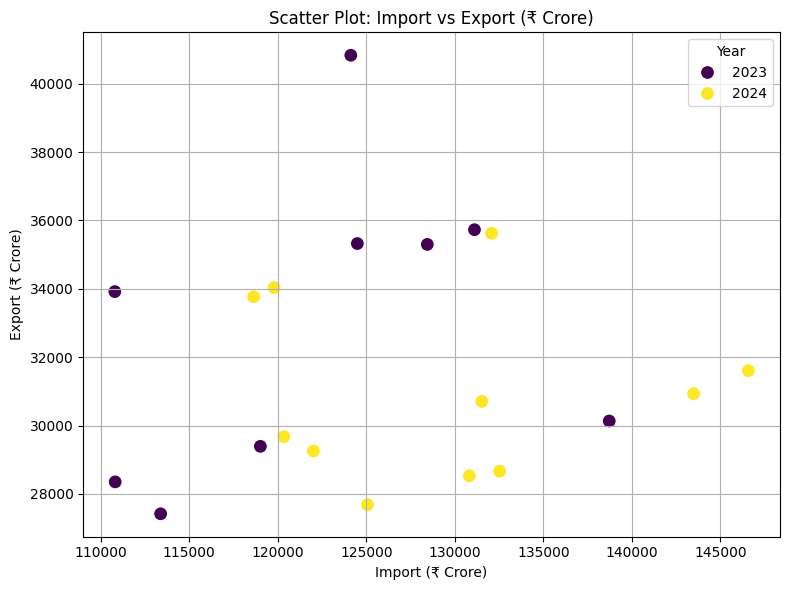

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pivot, x='Import', y='Export', hue='Year', palette='viridis', s=100)
plt.title('Scatter Plot: Import vs Export (₹ Crore)')
plt.xlabel('Import (₹ Crore)')
plt.ylabel('Export (₹ Crore)')
plt.grid(True)
plt.tight_layout()
plt.show()

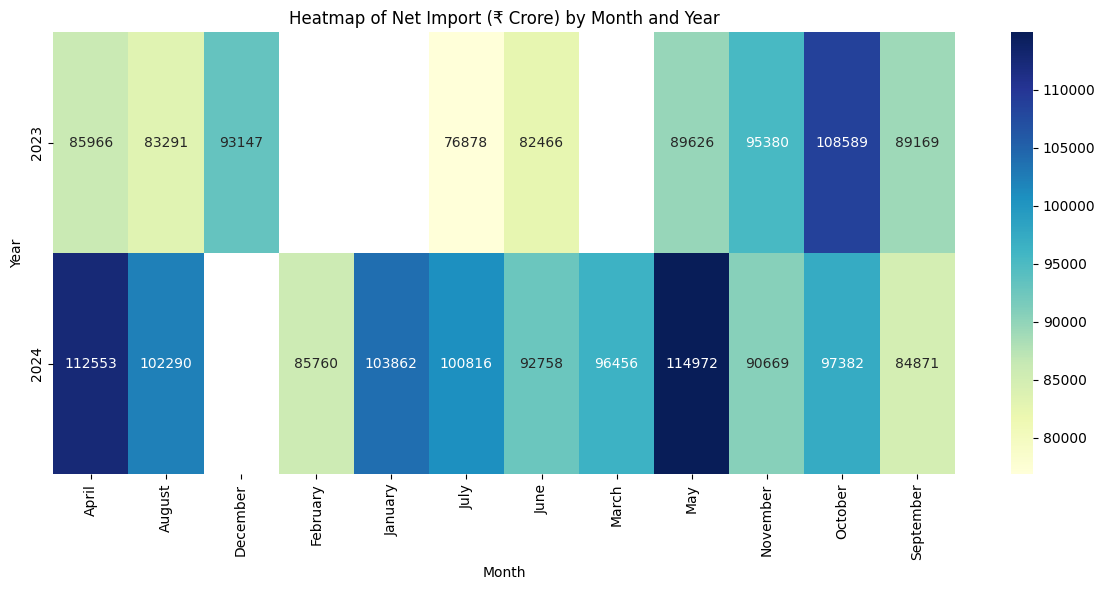

In [26]:
# Create pivot for heatmap
heatmap_data = pivot.pivot(index='Year', columns='Month', values='Net Import (₹ Crore)')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Heatmap of Net Import (₹ Crore) by Month and Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Function to detect outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df_filtered[column].quantile(0.25)
    Q3 = df_filtered[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_filtered[(df_filtered[column] < lower_bound) | (df_filtered[column] > upper_bound)]

# List of correct columns from your dataset
columns_to_check = [
    'Quantity (000 Metric Tonnes)',
    'Value in Rupees (Crore)',
    'Value in Dollars (Million US dollar)'
]

# Find outliers for each numeric column
outliers_list = []
for col in columns_to_check:
    outliers = find_outliers_iqr(df_filtered, col)
    outliers_list.append(outliers)

# Combine and drop duplicates
all_outliers = pd.concat(outliers_list).drop_duplicates()

# Display the outliers
print("🔎 Outliers found:")
print(all_outliers[['Month', 'Year', 'PRODUCTS', 'TRADE'] + columns_to_check])


🔎 Outliers found:
         Month  Year         PRODUCTS   TRADE  Quantity (000 Metric Tonnes)  \
0        April  2024        CRUDE OIL  Import                      21439.18   
11       April  2024  PRODUCT IMPORT*  Import                       4316.01   
26         May  2024        CRUDE OIL  Import                      22032.91   
37         May  2024  PRODUCT IMPORT*  Import                       4374.30   
52        June  2024        CRUDE OIL  Import                      18812.87   
63        June  2024  PRODUCT IMPORT*  Import                       3613.29   
78        July  2024        CRUDE OIL  Import                      19403.12   
89        July  2024  PRODUCT IMPORT*  Import                       4937.07   
104     August  2024        CRUDE OIL  Import                      20179.64   
115     August  2024  PRODUCT IMPORT*  Import                       4202.32   
130  September  2024        CRUDE OIL  Import                      18787.27   
141  September  2024  PRODUCT IMPO

🔎 Outliers found:
         Month  Year         PRODUCTS   TRADE  Quantity (000 Metric Tonnes)  \
0        April  2024        CRUDE OIL  Import                      21439.18   
11       April  2024  PRODUCT IMPORT*  Import                       4316.01   
26         May  2024        CRUDE OIL  Import                      22032.91   
37         May  2024  PRODUCT IMPORT*  Import                       4374.30   
52        June  2024        CRUDE OIL  Import                      18812.87   
78        July  2024        CRUDE OIL  Import                      19403.12   
89        July  2024  PRODUCT IMPORT*  Import                       4937.07   
104     August  2024        CRUDE OIL  Import                      20179.64   
115     August  2024  PRODUCT IMPORT*  Import                       4202.32   
130  September  2024        CRUDE OIL  Import                      18787.27   
156    October  2024        CRUDE OIL  Import                      19710.90   
167    October  2024  PRODUCT IMPO

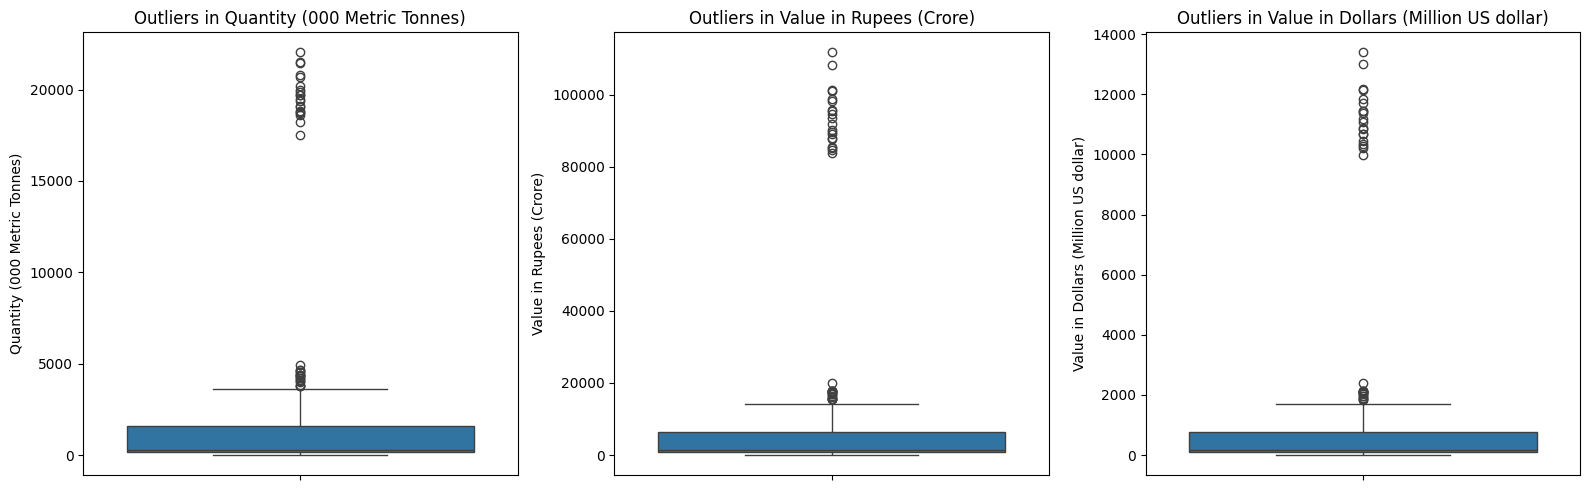

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only Import rows
df_import = df_filtered[df_filtered['TRADE'] == 'Import']

# Function to detect outliers using the IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Columns to check
columns_to_check = [
    'Quantity (000 Metric Tonnes)',
    'Value in Rupees (Crore)',
    'Value in Dollars (Million US dollar)'
]

# Find outliers
outliers_list = []
for col in columns_to_check:
    outliers = find_outliers_iqr(df_import, col)
    outliers_list.append(outliers)

# Combine outliers
all_outliers = pd.concat(outliers_list).drop_duplicates()

# Display outliers
print("🔎 Outliers found:")
print(all_outliers[['Month', 'Year', 'PRODUCTS', 'TRADE'] + columns_to_check])

# Plotting
plt.figure(figsize=(16, 5))

for i, col in enumerate(columns_to_check):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df_import, y=col)
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()
